# Klasifikasi Heart Disease


By Rofik

Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

# Data Description

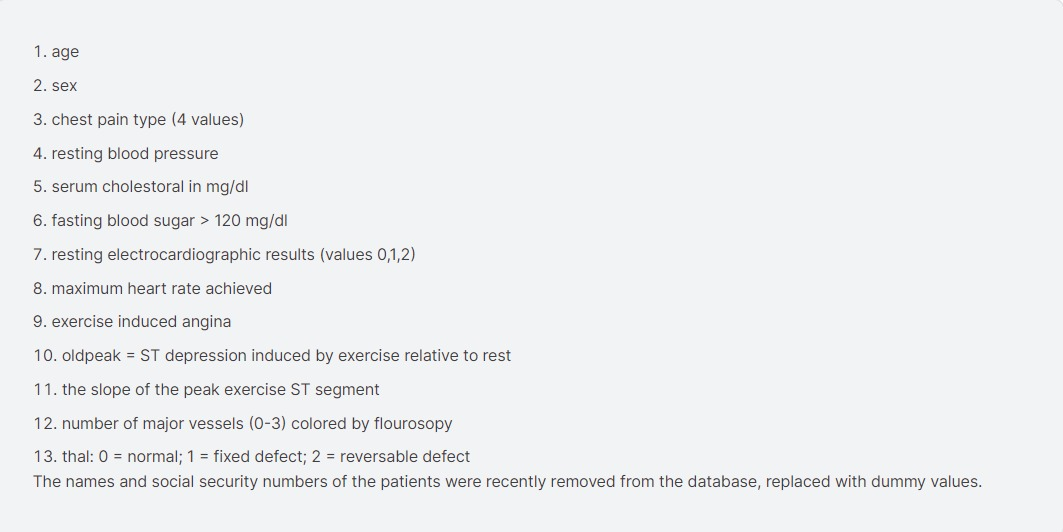

In [ ]:
#import package
import pandas as pd
import numpy as np

# Import Dataset

In [ ]:
# Baca data yang telah di-preprocess
df = pd.read_csv('https://raw.githubusercontent.com/rrofiikkk/machine-learning/refs/heads/main/heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Melihat columns apa saja yang ada dalam  dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# cek jumlah row dan column
df.shape

(1025, 14)

In [ ]:
# Check informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df1 = df.drop_duplicates(keep='first')

In [ ]:
# cek jumlah row dan column
df1.shape

(302, 14)

In [ ]:
#statistik deskriptif
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


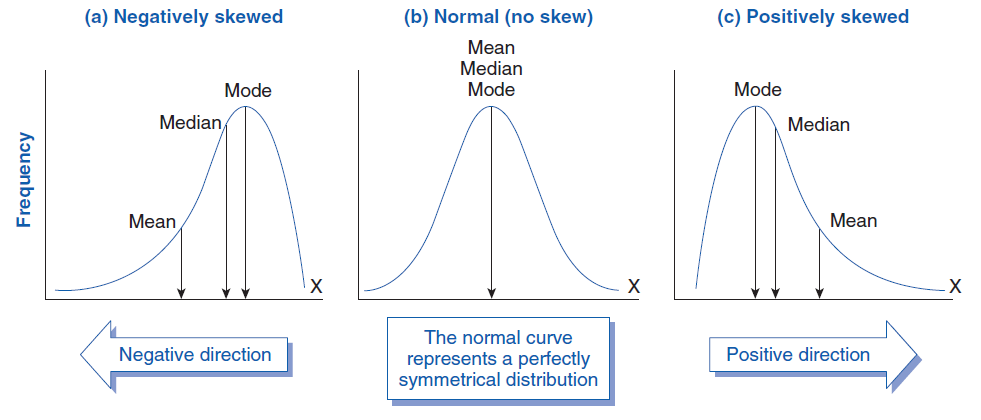

In [ ]:
import IPython

url = 'https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png'
img = IPython.display.Image(url, width = 1000)
img

In [ ]:
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan target
X = df1.drop('target', axis=1)
y = df1['target']

# Menerapkan SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Menggabungkan fitur dan target kembali
df2 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'target': y_resampled})], axis=1)

In [ ]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df2['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah Penderita Heart Disease: 164
Jumlah Orang Sehat: 164


# Model Development 1

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Bagi data menjadi fitur (X) dan label (y)
X = df2.drop('target', axis=1)
y = df2['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model XGBoost

In [ ]:
# Buat model XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold
xgb_scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
xgb_mean_score = np.mean(xgb_scores)

In [ ]:
print(f'Akurasi XGBoost: {xgb_mean_score:.2f}')

Akurasi XGBoost: 0.80


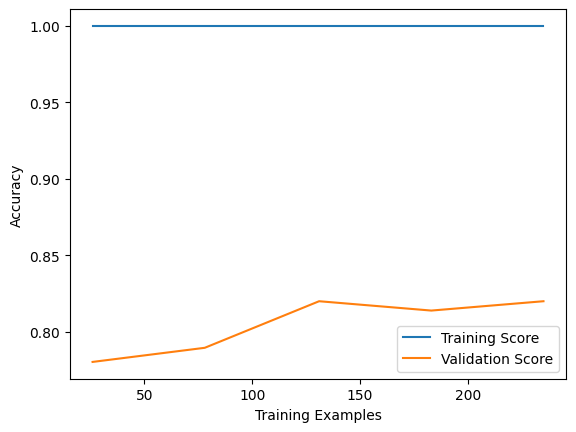

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(XGBClassifier(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Buat model Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold
rf_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
rf_mean_score = np.mean(rf_scores)

In [ ]:
print(f'Akurasi Random Forest: {rf_mean_score:.2f}')

Akurasi Random Forest: 0.84


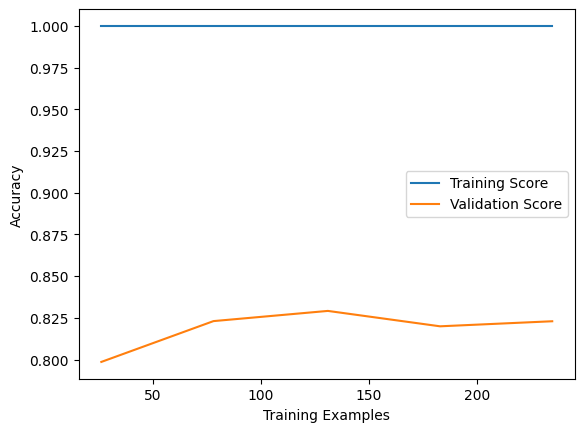

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(RandomForestClassifier(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Buat model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Melakukan cross-validation dengan 5 fold
knn_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
knn_mean_score = np.mean(knn_scores)

In [ ]:
print(f'Akurasi KNN: {knn_mean_score:.2f}')

Akurasi KNN: 0.84


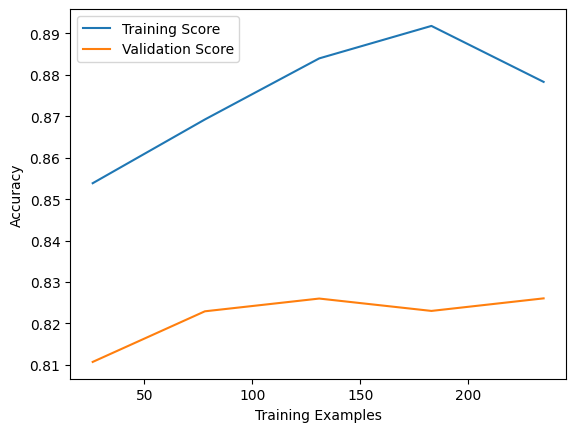

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression
# Buat model Regresi Logistik
lr = LogisticRegression()

# Melakukan cross-validation dengan 5 fold
lr_scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
lr_mean_score = np.mean(lr_scores)

In [ ]:
print(f'Akurasi Regresi Logistik: {lr_mean_score:.2f}')

Akurasi Regresi Logistik: 0.84


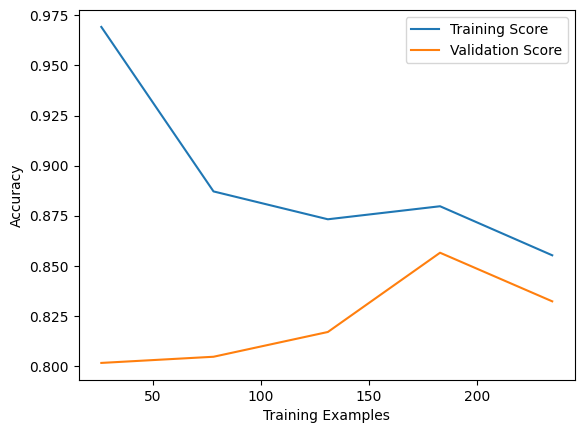

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
# Buat model Jaringan Saraf Tiruan (Neural Network)
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

# Melakukan cross-validation dengan 5 fold
nn_scores = cross_val_score(nn, X, y, cv=10, scoring='accuracy')
nn_mean_score = np.mean(nn_scores)

In [ ]:
print(f'Akurasi Neural Network: {nn_mean_score:.2f}')

Akurasi Neural Network: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

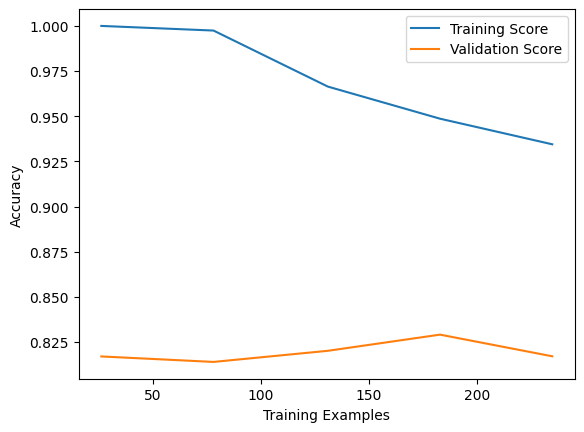

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Buat model Pohon Keputusan (Decision Tree)
dt = DecisionTreeClassifier()

# Melakukan cross-validation dengan 5 fold
dt_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
dt_mean_score = np.mean(dt_scores)

In [ ]:
print(f'Akurasi Decision Tree: {dt_mean_score:.2f}')

Akurasi Decision Tree: 0.78


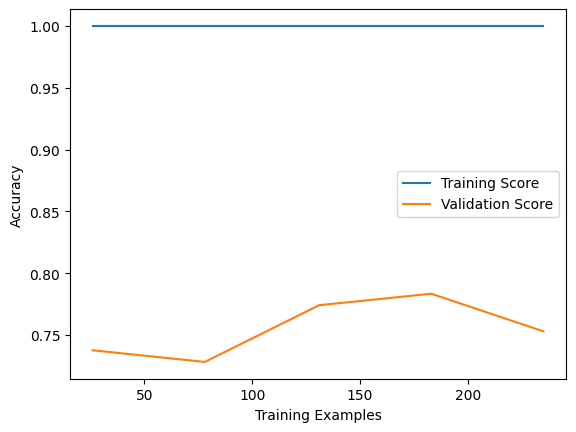

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeClassifier(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model SVM

In [ ]:
from sklearn.svm import SVC

# Buat model SVM
svm = SVC(kernel='linear')  # Anda dapat memilih kernel yang sesuai, seperti 'linear', 'rbf', atau 'poly'

# Melakukan cross-validation dengan 10 fold
svm_scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
svm_mean_score = np.mean(svm_scores)

# Tampilkan hasil evaluasi model SVM
print(f'Akurasi SVM: {svm_mean_score:.2f}')

Akurasi SVM: 0.84


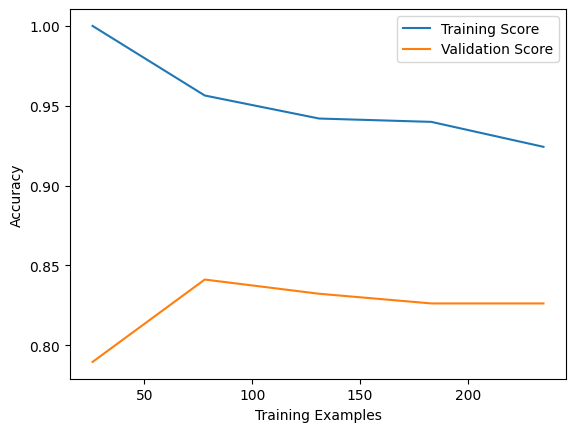

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(SVC(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# EDA

In [ ]:
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz

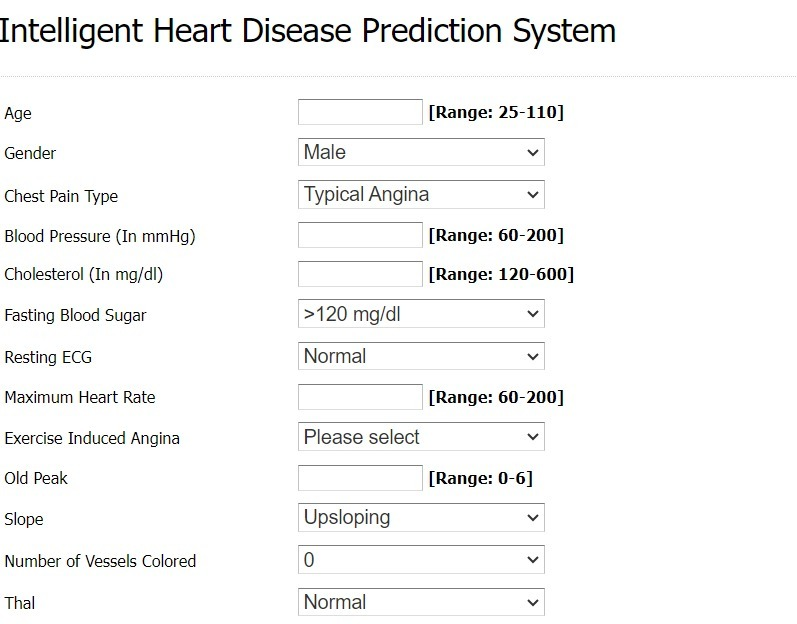

In [ ]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df1['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah Penderita Heart Disease: 164
Jumlah Orang Sehat: 138


In [ ]:
# Melihat distribusi kelas setelah SMOTE
class_counts = df2['target'].value_counts()
print('Jumlah Penderita Heart Disease:', class_counts[1])
print('Jumlah Orang Sehat:', class_counts[0])

Jumlah Penderita Heart Disease: 164
Jumlah Orang Sehat: 164


## Cek Outlier age

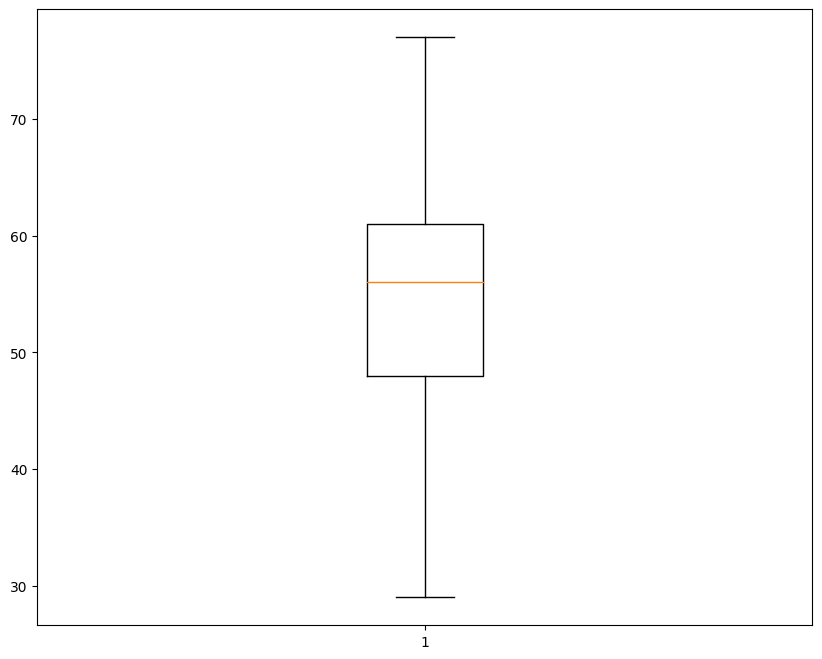

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df2['age'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df2.age, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df2.age, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr)
upper_bond = q3 + (1.5*iqr)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df2[(df2['age'] < lower_bond) | (df2['age'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


## Cek Outlier trestbps

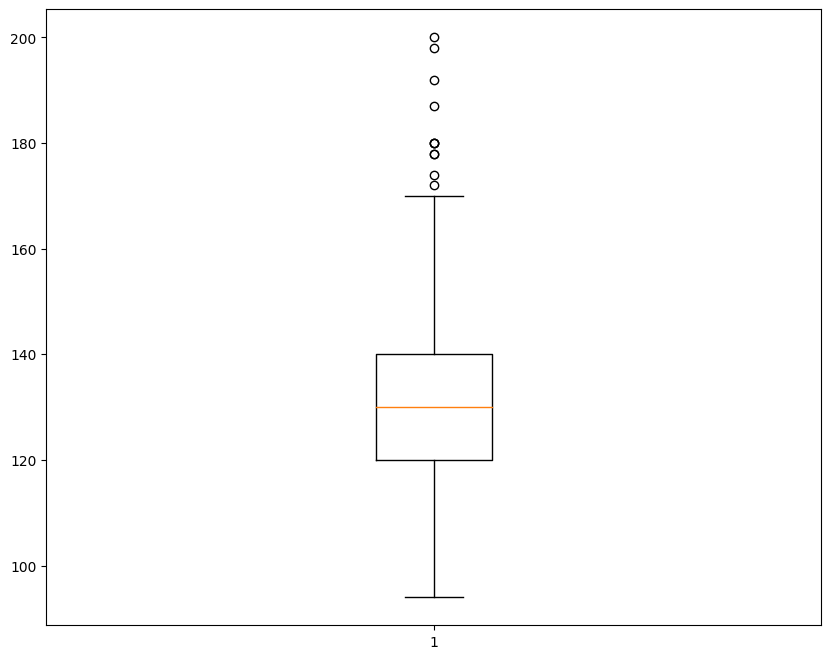

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df2['trestbps'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df2.trestbps, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df2.trestbps, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_trestbps = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_trestbps)
upper_bond = q3 + (1.5*iqr_trestbps)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df2[(df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,55,0,0,180,327,0,2,117,1,3.400000,1,0,2,0
44,66,0,0,178,228,1,1,165,1,1.000000,1,2,3,0
76,59,0,0,174,249,0,1,143,1,0.000000,1,0,2,0
112,64,0,0,180,325,0,1,154,1,0.000000,2,0,2,1
124,54,1,1,192,283,0,0,195,0,0.000000,2,1,3,0
142,56,0,0,200,288,1,0,133,1,4.000000,0,2,3,0
226,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
248,68,1,2,180,274,1,0,150,1,1.600000,1,0,3,0
271,59,1,3,178,270,0,0,145,0,4.200000,0,0,3,1
312,54,1,1,187,283,0,0,187,0,0.039935,1,0,3,0


In [ ]:
#drop outlier
df3 = df2[~((df2['trestbps'] < lower_bond) | (df2['trestbps'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df3.shape

(317, 14)

## Cek Outlier chol

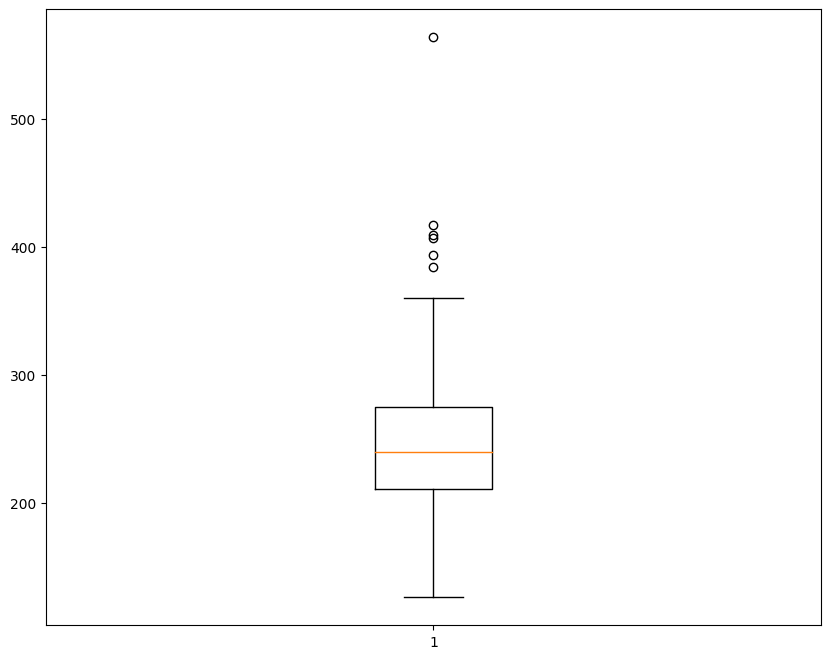

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df3['chol'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df3.chol, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df3.chol, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_chol = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_chol)
upper_bond = q3 + (1.5*iqr_chol)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df3[(df3['chol'] < lower_bond) | (df3['chol'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
104,65,0,2,140,417,1,0,157,0,0.800000,2,1,2,1
128,67,0,2,115,564,0,0,160,0,1.600000,1,0,3,1
144,56,0,0,134,409,0,0,150,1,1.900000,1,2,3,0
183,62,0,0,140,394,0,0,157,0,1.200000,1,0,2,1
260,63,0,0,150,407,0,0,154,0,4.000000,1,3,3,0
308,62,0,0,144,384,0,0,158,0,2.831421,1,2,2,0


In [ ]:
#drop outlier
df4 = df3[~((df3['chol'] < lower_bond) | (df3['chol'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df4.shape

(311, 14)

## Cek Outlier thalach

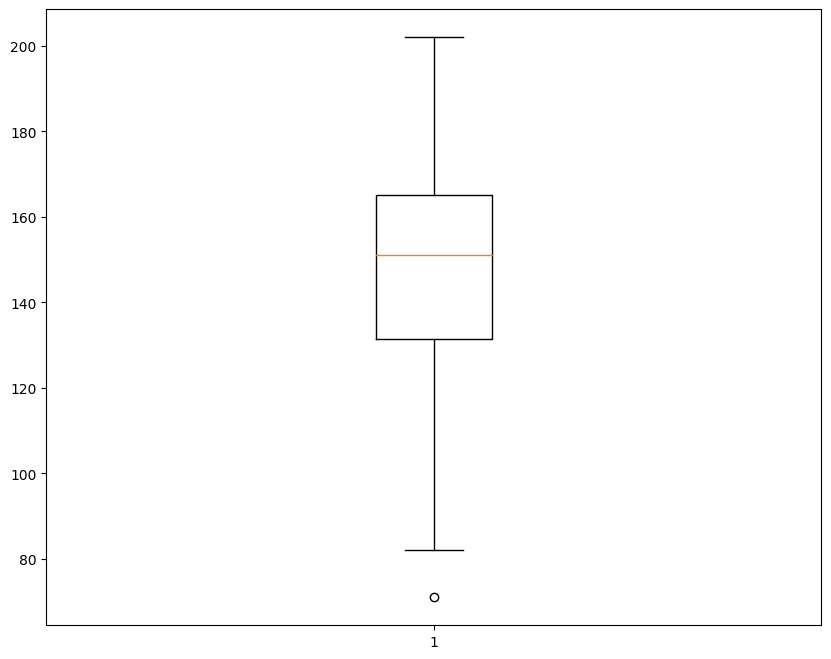

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df4['thalach'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df4.thalach, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df4.thalach, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_thalach = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_thalach)
upper_bond = q3 + (1.5*iqr_thalach)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df4[(df4['thalach'] < lower_bond) | (df4['thalach'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
188,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [ ]:
#drop outlier
df5 = df4[~((df4['thalach'] < lower_bond) | (df4['thalach'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df5.shape

(310, 14)

## Cek Outlier oldpeak

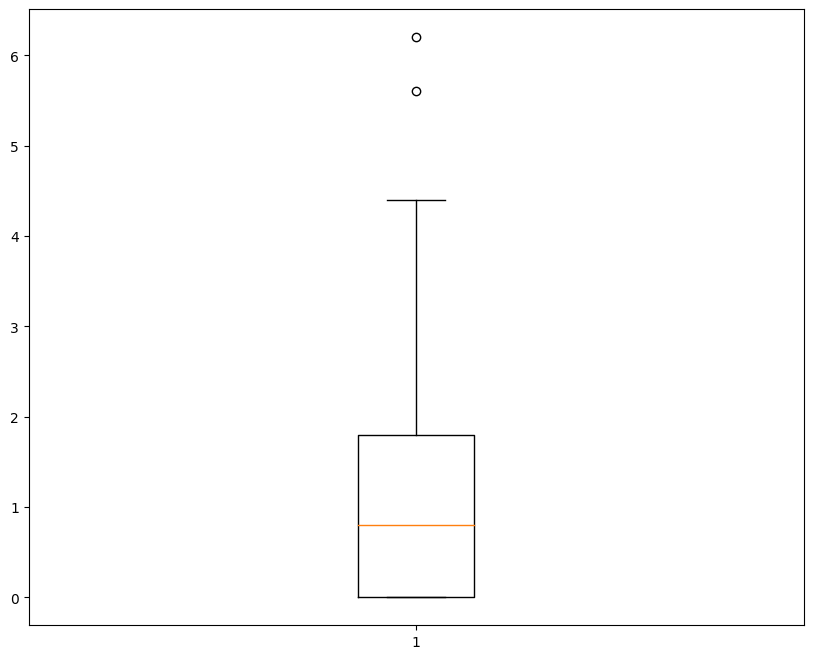

In [ ]:
#box-plot
fig = plt.figure(figsize =(10, 8))
plt.boxplot(df5['oldpeak'])
plt.show()

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df5.oldpeak, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df5.oldpeak, 75)

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_oldpeak = q3 - q1

In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr_oldpeak)
upper_bond = q3 + (1.5*iqr_oldpeak)

In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df5[(df5['oldpeak'] < lower_bond) | (df5['oldpeak'] > upper_bond)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
51,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
63,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


In [ ]:
#drop outlier
df6 = df5[~((df5['oldpeak'] < lower_bond) | (df5['oldpeak'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df6.shape

(308, 14)

<ipython-input-282-2433dd5087f6>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trestbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalach'),
  Text(0, 8.5, 'exang'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slope'),
  Text(0, 11.5, 'ca'),
  Text(0, 12.5, 'thal'),
  Text(0, 13.5, 'target')])

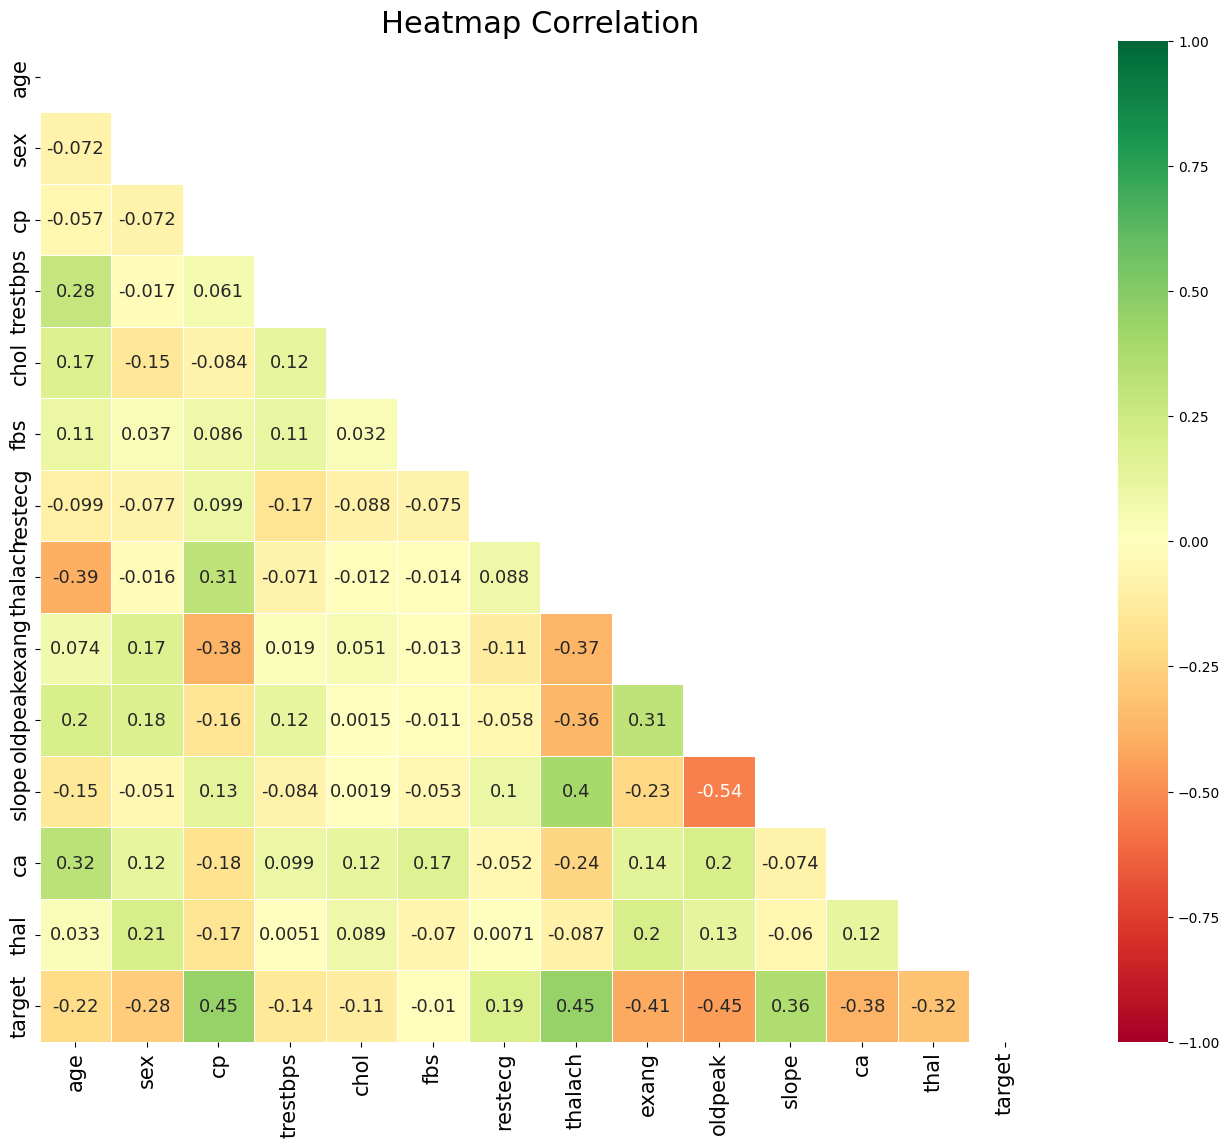

In [ ]:
#Heatmap Correlation
import seaborn as sns

corr = df6.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.7, annot_kws={"size": 13})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasrkan correlation test, dapat diketahui bahwa ada hubungan positif antara cp (0.45), restecg (0.19), thalach (0.45), slope (0.36).

Korelasi yang paling kuat:
- positif dengan target cp, thalach, slope
- negatif dengan target exang, oldpeak, ca, thal




<Axes: xlabel='age', ylabel='Count'>

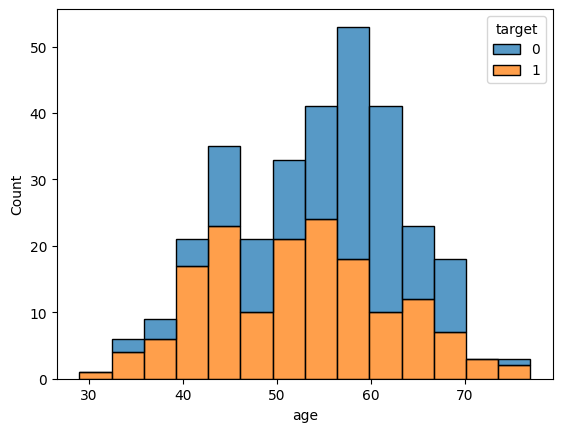

In [ ]:
sns.histplot(data=df6, x='age', hue='target', multiple='stack')

<Axes: xlabel='sex', ylabel='Count'>

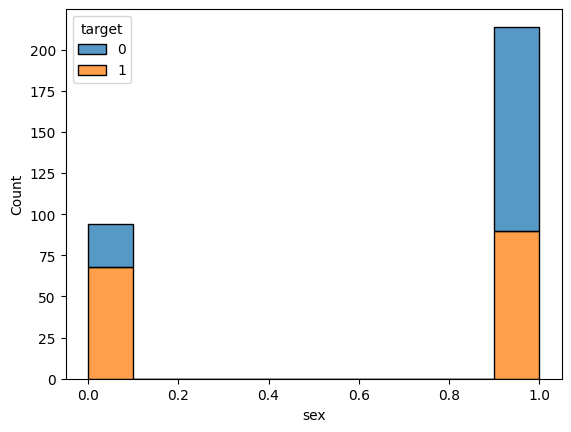

In [ ]:
sns.histplot(data=df6, x='sex', hue='target', multiple='stack')

<Axes: xlabel='cp', ylabel='Count'>

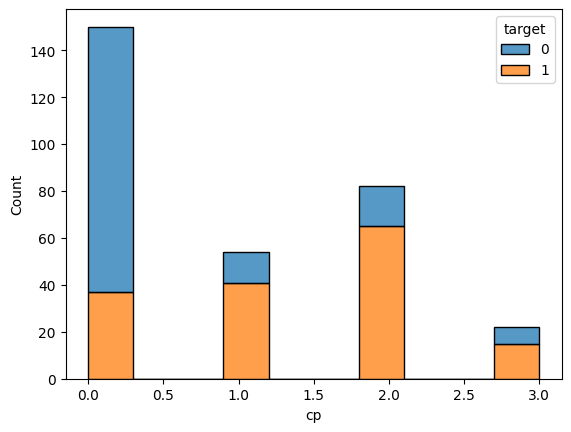

In [ ]:
sns.histplot(data=df6, x='cp', hue='target', multiple='stack')

<Axes: xlabel='trestbps', ylabel='Count'>

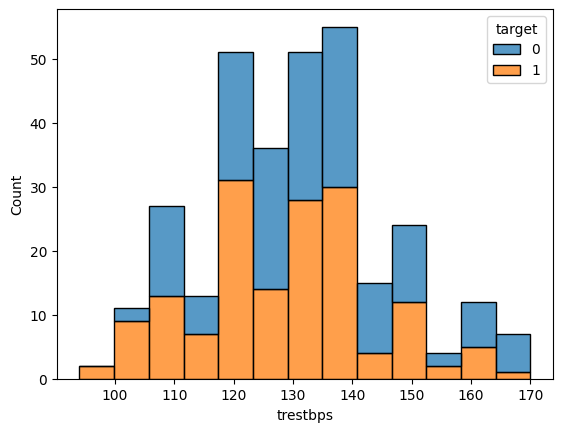

In [ ]:
sns.histplot(data=df6, x='trestbps', hue='target', multiple='stack')

<Axes: xlabel='chol', ylabel='Count'>

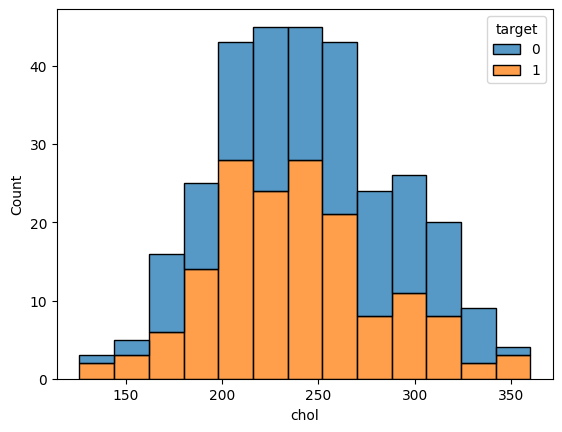

In [ ]:
sns.histplot(data=df6, x='chol', hue='target', multiple='stack')

<Axes: xlabel='fbs', ylabel='Count'>

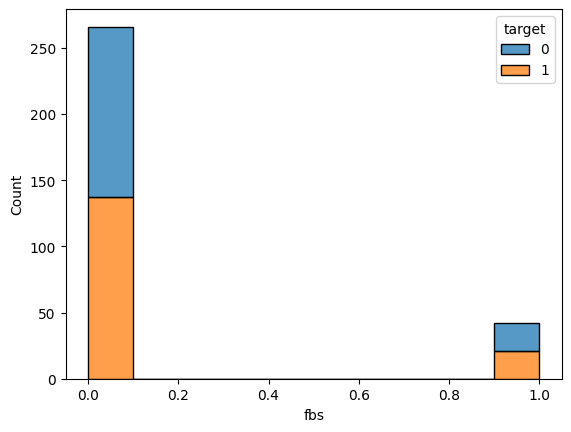

In [ ]:
sns.histplot(data=df6, x='fbs', hue='target', multiple='stack')

<Axes: xlabel='restecg', ylabel='Count'>

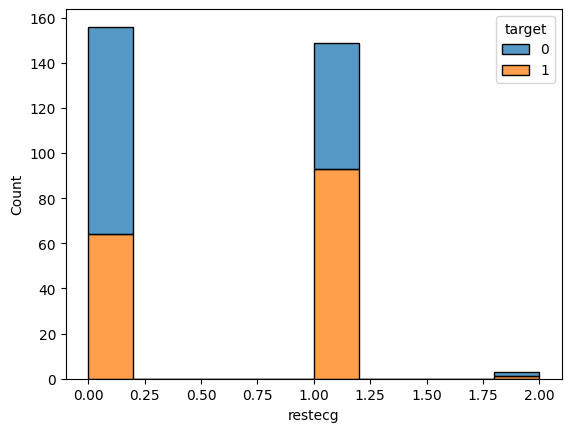

In [ ]:
sns.histplot(data=df6, x='restecg', hue='target', multiple='stack')

<Axes: xlabel='thalach', ylabel='Count'>

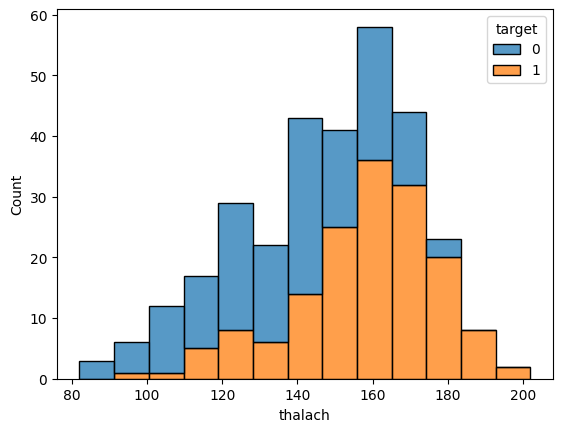

In [ ]:
sns.histplot(data=df6, x='thalach', hue='target', multiple='stack')

<Axes: xlabel='exang', ylabel='Count'>

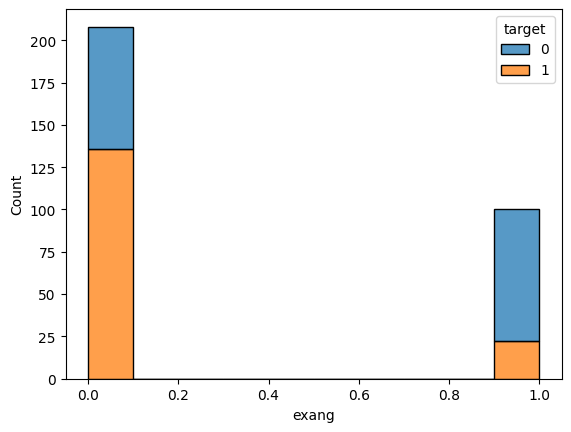

In [ ]:
sns.histplot(data=df6, x='exang', hue='target', multiple='stack')

<Axes: xlabel='oldpeak', ylabel='Count'>

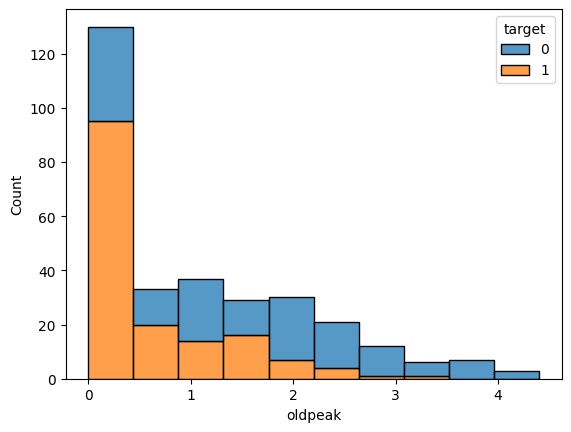

In [ ]:
sns.histplot(data=df6, x='oldpeak', hue='target', multiple='stack')

<Axes: xlabel='slope', ylabel='Count'>

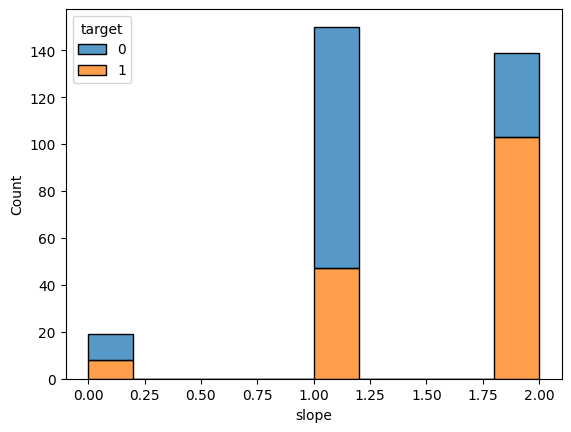

In [ ]:
sns.histplot(data=df6, x='slope', hue='target', multiple='stack')

<Axes: xlabel='ca', ylabel='Count'>

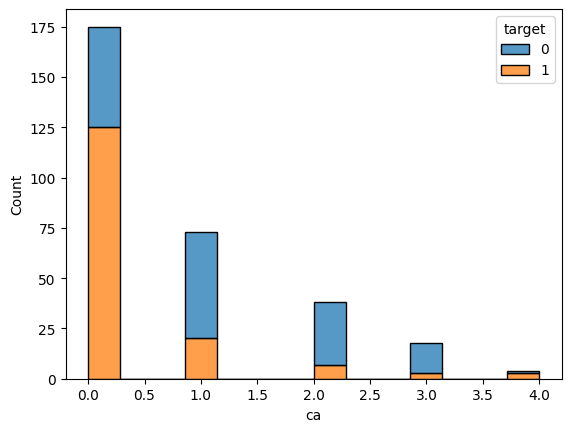

In [ ]:
sns.histplot(data=df6, x='ca', hue='target', multiple='stack')

<Axes: xlabel='thal', ylabel='Count'>

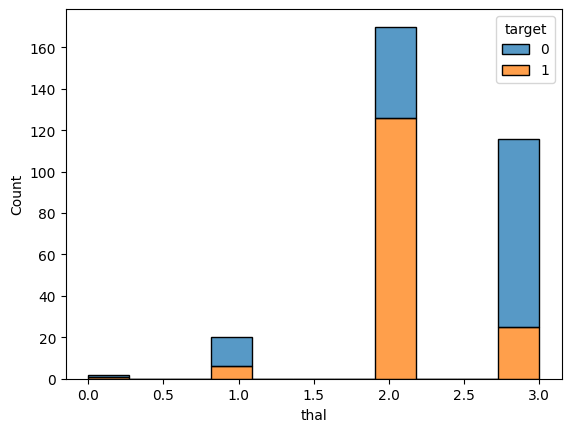

In [ ]:
sns.histplot(data=df6, x='thal', hue='target', multiple='stack')

# Model Development 2

In [ ]:
# Bagi data menjadi fitur (X) dan label (y)
X = df6.drop('target', axis=1)
y = df6['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Normalisasi data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

135    1
116    0
263    1
249    1
215    0
      ..
201    1
75     1
113    1
287    1
108    1
Name: target, Length: 246, dtype: int64

In [ ]:
y_test

305    0
9      0
60     1
64     0
25     1
      ..
211    1
208    1
223    1
238    1
169    1
Name: target, Length: 62, dtype: int64

In [ ]:
#menampilkan dataset X_train setalag di scaling
np.set_printoptions(suppress=True)
print(X_train[:10])

[[-1.24651571  0.66276115  1.06062168 -0.02900766  1.58017144 -0.39735971
   0.95694179  0.58786296 -0.69337525  0.82053521  1.01563771  0.29511808
  -0.4856386 ]
 [ 0.76650005  0.66276115  2.04457192  0.2299593  -0.19872469 -0.39735971
   0.95694179 -0.14675529 -0.69337525  1.47706797 -0.64827939  1.3164256
  -0.4856386 ]
 [ 0.43099742 -1.5088392  -0.90727879 -0.02900766 -1.01130687 -0.39735971
   0.95694179 -0.75173502 -0.69337525 -0.39873992 -0.64827939 -0.72618943
  -0.4856386 ]
 [ 1.77300793  0.66276115  0.07667145  1.65427761  0.0428538  -0.39735971
  -0.96945083 -0.23318096 -0.69337525 -0.96148228  1.01563771 -0.72618943
  -0.4856386 ]
 [-1.02284729  0.66276115 -0.90727879  0.74789323  1.44840135 -0.39735971
  -0.96945083 -0.06032961  1.44222051 -0.96148228 -0.64827939  2.33773311
   1.14019498]
 [ 0.31916321 -1.5088392  -0.90727879 -0.15849115  1.31663127 -0.39735971
  -0.96945083  0.45822445 -0.69337525 -0.96148228  1.01563771  0.29511808
  -0.4856386 ]
 [-0.46367625  0.662761

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
323    0
324    0
325    0
326    0
327    0
Name: target, Length: 308, dtype: int64

## XGBoost

In [ ]:
# Buat model XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold
xgb_scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
xgb_mean_score = np.mean(xgb_scores)

In [ ]:
print(f'Akurasi XGBoost: {xgb_mean_score:.2f}')

Akurasi XGBoost: 0.80


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Buat model Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold
rf_scores = cross_val_score(rf, X, y, cv=10, scoring='accuracy')
rf_mean_score = np.mean(rf_scores)

In [ ]:
print(f'Akurasi Random Forest: {rf_mean_score:.2f}')

Akurasi Random Forest: 0.82


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Buat model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Melakukan cross-validation dengan 5 fold
knn_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
knn_mean_score = np.mean(knn_scores)

In [ ]:
print(f'Akurasi KNN: {knn_mean_score:.2f}')

Akurasi KNN: 0.82


## Regresi Logistik

In [ ]:
from sklearn.linear_model import LogisticRegression
# Buat model Regresi Logistik
lr = LogisticRegression()

# Melakukan cross-validation dengan 5 fold
lr_scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
lr_mean_score = np.mean(lr_scores)

In [ ]:
print(f'Akurasi Regresi Logistik: {lr_mean_score:.2f}')

Akurasi Regresi Logistik: 0.85


## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
# Buat model Jaringan Saraf Tiruan (Neural Network)
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

# Melakukan cross-validation dengan 5 fold
nn_scores = cross_val_score(nn, X, y, cv=10, scoring='accuracy')
nn_mean_score = np.mean(nn_scores)

In [ ]:
print(f'Akurasi Neural Network: {nn_mean_score:.2f}')

Akurasi Neural Network: 0.80


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Buat model Pohon Keputusan (Decision Tree)
dt = DecisionTreeClassifier()

# Melakukan cross-validation dengan 5 fold
dt_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
dt_mean_score = np.mean(dt_scores)

In [ ]:
print(f'Akurasi Decision Tree: {dt_mean_score:.2f}')

Akurasi Decision Tree: 0.76


## SVM

In [ ]:
from sklearn.svm import SVC

# Buat model SVM
svm = SVC(kernel='linear')  # Anda dapat memilih kernel yang sesuai, seperti 'linear', 'rbf', atau 'poly'

# Melakukan cross-validation dengan 10 fold
svm_scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
svm_mean_score = np.mean(svm_scores)

# Tampilkan hasil evaluasi model SVM
print(f'Akurasi SVM: {svm_mean_score:.2f}')

Akurasi SVM: 0.83


# Seleksi Fitur

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# with function ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
import pandas as pd
# Konversi numpy.ndarray (X) menjadi DataFrame
X_df = pd.DataFrame(X)

rfc_fimp = pd.Series(rf.feature_importances_, index=X_df.columns)
rfc_fimp = rfc_fimp.sort_values(ascending=False)


In [ ]:
rfc_fimp

2     0.216108
9     0.138768
11    0.123651
7     0.118720
12    0.077516
4     0.074683
0     0.071092
3     0.068902
10    0.033661
1     0.031242
6     0.024010
8     0.014429
5     0.007217
dtype: float64

In [ ]:
import pandas as pd

# Konversi numpy.ndarray (X) menjadi DataFrame
X_df = pd.DataFrame(X)

rfc_fimp = pd.Series(rf.feature_importances_, index=X_df.columns)

# Mengambil beberapa fitur teratas beserta bobotnya
top_features = rfc_fimp.nlargest(5)  # Ubah angka 5 sesuai dengan jumlah fitur yang ingin Anda tampilkan

top_features


2     0.216108
9     0.138768
11    0.123651
7     0.118720
12    0.077516
dtype: float64

Dari hasil seleksi fitur menggunakan random forest regsessor. Terdapat 5 fitur yang paling berkolerasi dengan target. Yaitu fitur ke 2 (cp), 7 (thalach), 9 (oldpeak), 11 (ca), 12 (thal)

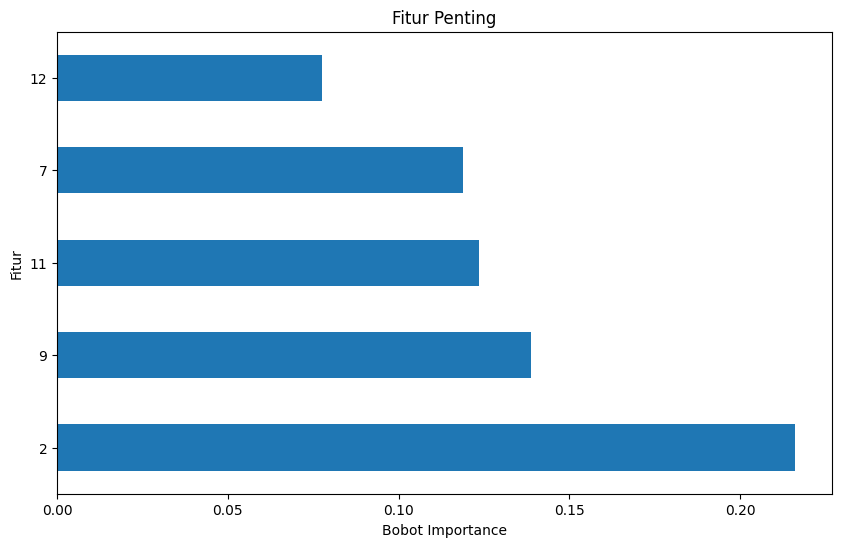

In [ ]:
import matplotlib.pyplot as plt

# Mengambil beberapa fitur teratas beserta bobotnya
top_features = rfc_fimp.nlargest(5)

plt.figure(figsize=(10,6))
top_features.sort_values(ascending=False).plot(kind='barh')
plt.title('Fitur Penting', size=12)
plt.xlabel('Bobot Importance')
plt.ylabel('Fitur')
plt.show()

# Model Development 3

In [ ]:
# Mengambil hanya 30 fitur teratas berdasarkan importance
selected_features = rfc_fimp.nlargest(5).index

# Membuat DataFrame baru hanya dengan fitur-fitur terpilih
X_selected = X_df[selected_features]

In [ ]:
X_selected

,2,9,11,7,12
0,-0.907279,-0.023578,1.316426,0.847140,1.140195
1,-0.907279,1.946020,-0.726189,0.285373,1.140195
2,-0.907279,1.477068,-0.726189,-1.011012,1.140195
3,-0.907279,-0.961482,0.295118,0.544650,1.140195
4,-0.907279,0.820535,2.337733,-1.832056,-0.485639
...,...,...,...,...,...
303,-0.907279,-0.016601,-0.726189,-0.967799,-0.485639
304,-0.907279,0.420700,-0.726189,1.019991,1.140195
305,-0.907279,0.689801,0.295118,0.242160,1.140195
306,0.076671,1.124798,0.295118,-0.665309,-2.111472


## FS+XGBoost

In [ ]:
# Buat model XGBoost
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold
xgb_scores = cross_val_score(xgb, X_selected, y, cv=10, scoring='accuracy')
xgb_mean_score = np.mean(xgb_scores)

In [ ]:
print(f'Akurasi XGBoost: {xgb_mean_score:.2f}')

Akurasi XGBoost: 0.80


## FS+RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Buat model Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=3)

# Melakukan cross-validation dengan 5 fold
rf_scores = cross_val_score(rf, X_selected, y, cv=10, scoring='accuracy')
rf_mean_score = np.mean(rf_scores)

In [ ]:
print(f'Akurasi Random Forest: {rf_mean_score:.2f}')

Akurasi Random Forest: 0.83


## FS+KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Buat model K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Melakukan cross-validation dengan 5 fold
knn_scores = cross_val_score(knn, X_selected, y, cv=10, scoring='accuracy')
knn_mean_score = np.mean(knn_scores)

In [ ]:
print(f'Akurasi KNN: {knn_mean_score:.2f}')

Akurasi KNN: 0.80


## FS+LR

In [ ]:
from sklearn.linear_model import LogisticRegression
# Buat model Regresi Logistik
lr = LogisticRegression()

# Melakukan cross-validation dengan 5 fold
lr_scores = cross_val_score(lr, X_selected, y, cv=10, scoring='accuracy')
lr_mean_score = np.mean(lr_scores)

In [ ]:
print(f'Akurasi Regresi Logistik: {lr_mean_score:.2f}')

Akurasi Regresi Logistik: 0.84


## FS+NN

In [ ]:
from sklearn.neural_network import MLPClassifier
# Buat model Jaringan Saraf Tiruan (Neural Network)
nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000)

# Melakukan cross-validation dengan 5 fold
nn_scores = cross_val_score(nn, X, y, cv=10, scoring='accuracy')
nn_mean_score = np.mean(nn_scores)

In [ ]:
print(f'Akurasi Neural Network: {nn_mean_score:.2f}')

Akurasi Neural Network: 0.80


## FS+DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Buat model Pohon Keputusan (Decision Tree)
dt = DecisionTreeClassifier()

# Melakukan cross-validation dengan 5 fold
dt_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
dt_mean_score = np.mean(dt_scores)

In [ ]:
print(f'Akurasi Decision Tree: {dt_mean_score:.2f}')

Akurasi Decision Tree: 0.75


## FS+SVM

In [ ]:
from sklearn.svm import SVC

# Buat model SVM
svm = SVC(kernel='linear')  # Anda dapat memilih kernel yang sesuai, seperti 'linear', 'rbf', atau 'poly'

# Melakukan cross-validation dengan 10 fold
svm_scores = cross_val_score(svm, X, y, cv=10, scoring='accuracy')
svm_mean_score = np.mean(svm_scores)

# Tampilkan hasil evaluasi model SVM
print(f'Akurasi SVM: {svm_mean_score:.2f}')

Akurasi SVM: 0.83


Algoritma Logistic Regression, SVM, dan Random Forest merupakan algoritma yang cenderung menunjukkan perfroma yang baik dalam kasus ini.